Bloco 1.1: Importação das Bibliotecas

In [ ]:
# 1. Bibliotecas de manipulação de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. Bibliotecas de Machine Learning (Scikit-Learn)
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     GridSearchCV, cross_validate)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, 
                             recall_score, f1_score)

# 3. Bibliotecas de Reamostragem (Imbalanced-Learn)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

print("Todas as bibliotecas foram importadas com sucesso!")

Todas as bibliotecas foram importadas com sucesso!


Bloco 1.2: Carregamento dos Dados

In [4]:
try:
    df = pd.read_csv('dataset.csv', encoding='utf-8')
    print("Dataset carregado com sucesso!")
    print("\nAmostra dos dados:")
    print(df.head())
except FileNotFoundError:
    print("ERRO: Arquivo 'spotify_data.csv' não encontrado.")
    print("Por favor, verifique o nome e o local do arquivo.")
    df = None # Define df como None para evitar erros nos próximos blocos

Dataset carregado com sucesso!

Amostra dos dados:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To

Bloco 1.3: Investigação Inicial do Dataset

In [5]:
if df is not None:
    print("--- Informações Gerais do Dataset ---")
    df.info()

    print("\n--- Dimensões do Dataset ---")
    print(f"{df.shape[0]} linhas e {df.shape[1]} colunas.")

    print("\n--- Verificação de Dados Duplicados ---")
    print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

    print("\n--- Estatísticas Descritivas (Colunas Numéricas) ---")
    print(df.describe())
else:
    print("Dataset não foi carregado. Pule este bloco.")

--- Informações Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-n

Bloco 1.4: Análise de Popularidade (Artistas, Músicas e Gêneros)

In [6]:
if df is not None:
    print("--- Top 10 Músicas Mais Populares ---")
    top_10_musicas = df.sort_values('popularity', ascending=False).head(10)
    print(top_10_musicas[['track_name', 'artists', 'popularity']])
    
    print("\n--- Top 10 Artistas Mais Populares (por média de popularidade) ---")
    artistas_populares = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
    print(artistas_populares)

    print("\n--- Top 10 Gêneros Mais Populares (por média de popularidade) ---")
    # Correção feita aqui: 'playlist_genre' -> 'track_genre'
    generos_populares = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
    print(generos_populares)
else:
    print("Dataset não foi carregado. Pule este bloco.")

--- Top 10 Músicas Mais Populares ---
                                  track_name                  artists  \
81051              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
20001              Unholy (feat. Kim Petras)     Sam Smith;Kim Petras   
51664  Quevedo: Bzrp Music Sessions, Vol. 52         Bizarrap;Quevedo   
89411                             La Bachata            Manuel Turizo   
30003                        I'm Good (Blue)  David Guetta;Bebe Rexha   
20008                        I'm Good (Blue)  David Guetta;Bebe Rexha   
81210                        I'm Good (Blue)  David Guetta;Bebe Rexha   
88410                             La Bachata            Manuel Turizo   
67356                             La Bachata            Manuel Turizo   
68303                             La Bachata            Manuel Turizo   

       popularity  
81051         100  
20001         100  
51664          99  
89411          98  
30003          98  
20008          98  
81210          98 

Bloco 1.5: Visualizações

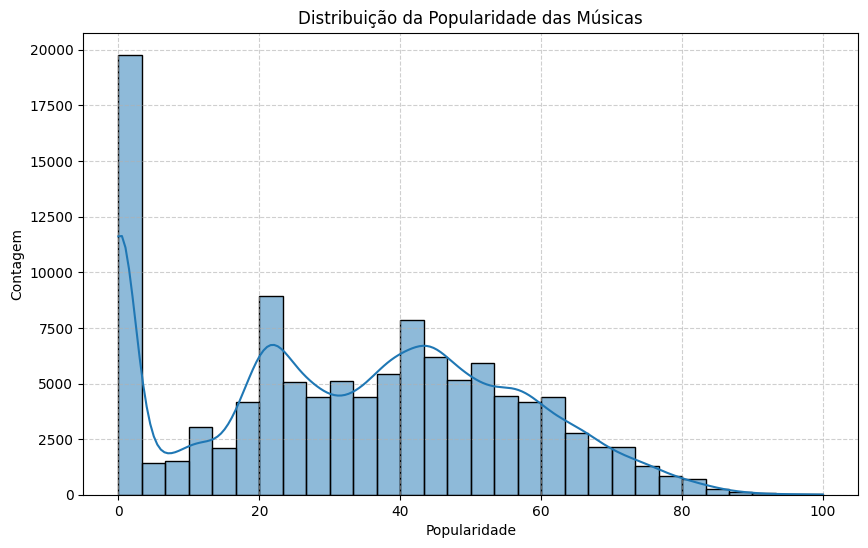

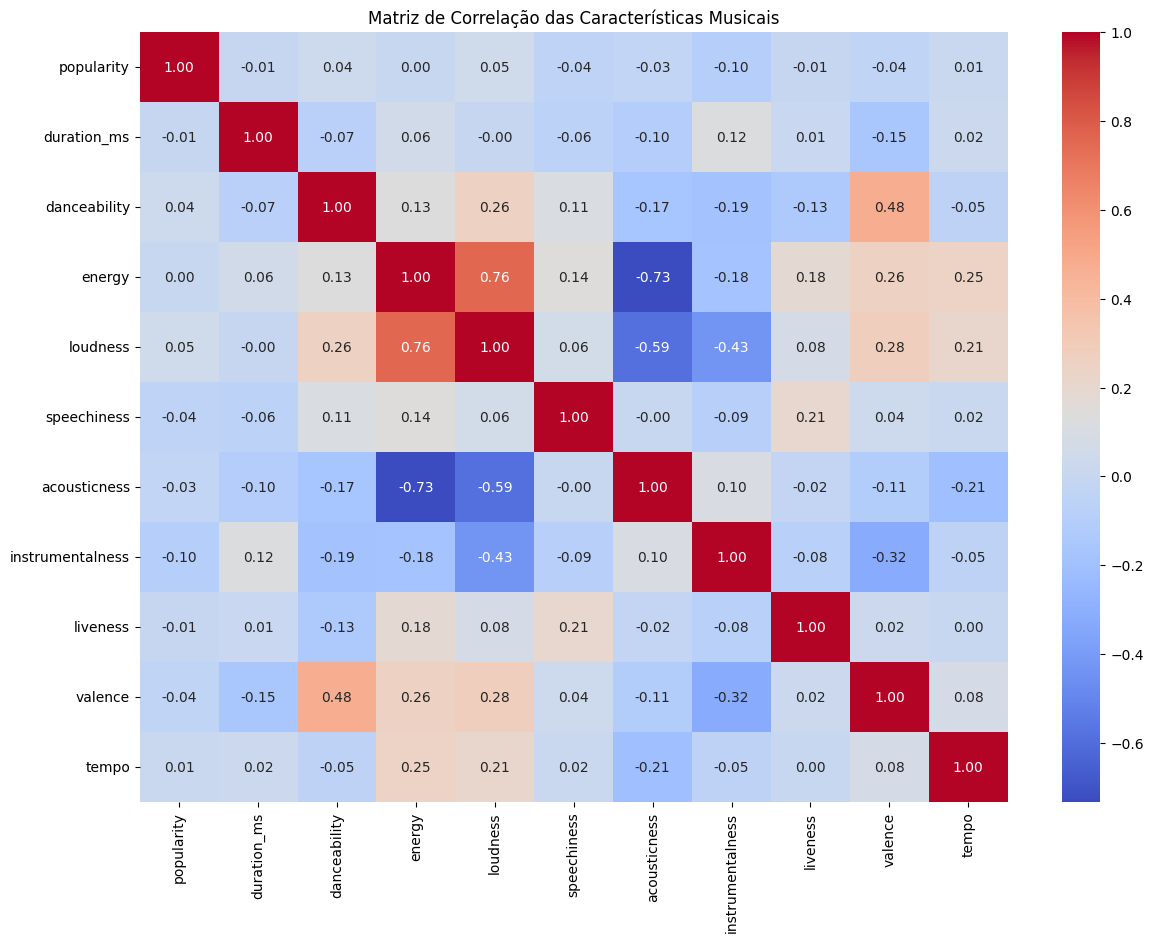

In [7]:
if df is not None:
    # Gráfico 1: Distribuição da Popularidade
    plt.figure(figsize=(10, 6))
    sns.histplot(df['popularity'], bins=30, kde=True)
    plt.title('Distribuição da Popularidade das Músicas')
    plt.xlabel('Popularidade')
    plt.ylabel('Contagem')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Gráfico 2: Matriz de Correlação
    plt.figure(figsize=(14, 10))
    features_corr = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    correlation_matrix = df[features_corr].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlação das Características Musicais')
    plt.show()
else:
    print("Dataset não foi carregado. Pule este bloco.")

Bloco 2.1: Limpeza de Dados (Nulos e Duplicados)

In [8]:
if df is not None:
    print(f"Formato original: {df.shape}")

    # Tratando valores nulos (removendo as linhas)
    df.dropna(inplace=True)
    print(f"Formato após remover nulos: {df.shape}")

    # Removendo dados duplicados
    df.drop_duplicates(inplace=True)
    print(f"Formato após remover duplicatas: {df.shape}")
else:
    print("Dataset não foi carregado. Pule este bloco.")

Formato original: (114000, 21)
Formato após remover nulos: (113999, 21)
Formato após remover duplicatas: (113999, 21)


Bloco 2.2: Engenharia de Recursos e Seleção de Variáveis

In [9]:
if df is not None:
    # 1. Criar a variável alvo 'is_popular'
    corte_popularidade = 70
    df['is_popular'] = (df['popularity'] >= corte_popularidade).astype(int)
    print("--- Distribuição da nova variável 'is_popular' ---")
    print(df['is_popular'].value_counts(normalize=True))

    # 2. Selecionar features numéricas para o modelo (X) e a variável alvo (y)
    features = df.select_dtypes(include=np.number).drop(columns=['popularity', 'is_popular'])
    target = df['is_popular']

    X = features
    y = target

    print("\n--- Features (X) selecionadas para o modelo ---")
    print(X.head())

    print("\n--- Variável Alvo (y) ---")
    print(y.head())
else:
    print("Dataset não foi carregado. Pule este bloco.")

--- Distribuição da nova variável 'is_popular' ---
is_popular
0    0.952
1    0.048
Name: proportion, dtype: float64

--- Features (X) selecionadas para o modelo ---
   Unnamed: 0  duration_ms  danceability  energy  key  loudness  mode  \
0           0       230666         0.676  0.4610    1    -6.746     0   
1           1       149610         0.420  0.1660    1   -17.235     1   
2           2       210826         0.438  0.3590    0    -9.734     1   
3           3       201933         0.266  0.0596    0   -18.515     1   
4           4       198853         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4    

Bloco 3.1: Divisão em Treino e Teste

In [10]:
if 'X' in globals() and 'y' in globals():
    # Dividindo os dados em 80% treino e 20% teste
    # stratify=y garante que a proporção de classes seja a mesma nos dois conjuntos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- Dimensões dos Conjuntos ---")
    print(f"X_train: {X_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}")
    print(f"y_test: {y_test.shape}")

    print("\n--- Proporção da classe 'popular' no treino ---")
    print(y_train.value_counts(normalize=True))

    print("\n--- Proporção da classe 'popular' no teste ---")
    print(y_test.value_counts(normalize=True))
else:
    print("Variáveis X e y não definidas. Execute os blocos do Dia 2 primeiro.")

--- Dimensões dos Conjuntos ---
X_train: (91199, 14)
y_train: (91199,)
X_test: (22800, 14)
y_test: (22800,)

--- Proporção da classe 'popular' no treino ---
is_popular
0    0.951995
1    0.048005
Name: proportion, dtype: float64

--- Proporção da classe 'popular' no teste ---
is_popular
0    0.952018
1    0.047982
Name: proportion, dtype: float64


Bloco 3.2: Configuração da Validação Cruzada

In [11]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"Objeto de validação cruzada (StratifiedKFold) criado com {n_splits} dobras.")

Objeto de validação cruzada (StratifiedKFold) criado com 5 dobras.


Bloco 4.1: Criação e Treinamento do Pipeline com Validação Cruzada

In [12]:
if 'X_train' in globals():
    # O pipeline automatiza o pré-processamento (padronização) e o treinamento do modelo
    pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')) # Adicione este parâmetro
    ])

    # Métricas que queremos avaliar durante a validação cruzada
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

    # Executa a validação cruzada
    cv_results = cross_validate(pipeline_logreg, X_train, y_train, cv=skf, scoring=scoring_metrics)

    print("--- Resultados da Validação Cruzada (Média dos 5 folds) ---")
    for metric in scoring_metrics:
        mean_score = cv_results[f'test_{metric}'].mean()
        std_score = cv_results[f'test_{metric}'].std()
        print(f"  - Média {metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")
else:
    print("Conjunto de treino não definido. Execute os blocos do Dia 3 primeiro.")

--- Resultados da Validação Cruzada (Média dos 5 folds) ---
  - Média Accuracy: 0.5634 (+/- 0.0053)
  - Média Precision: 0.0769 (+/- 0.0016)
  - Média Recall: 0.7360 (+/- 0.0207)
  - Média F1: 0.1393 (+/- 0.0029)


Bloco 4.3: Treinamento do Modelo Final

In [13]:
if 'pipeline_logreg' in globals():
    # Treina o pipeline com TODOS os dados de treino para ter o modelo final
    pipeline_logreg.fit(X_train, y_train)
    print("Modelo de baseline (Regressão Logística) treinado com sucesso!")
else:
    print("Pipeline não foi criado. Execute o bloco 4.2 primeiro.")

Modelo de baseline (Regressão Logística) treinado com sucesso!


Bloco 5.2: Previsões e Métricas de Avaliação no Conjunto de Teste

In [14]:
if 'pipeline_logreg' in globals():
    # Faz as previsões no conjunto de teste (dados que o modelo nunca viu)
    y_pred = pipeline_logreg.predict(X_test)

    # Calcula as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("--- Desempenho do Modelo no Conjunto de Teste ---")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
else:
    print("Modelo não foi treinado. Execute os blocos do Dia 4 primeiro.")

--- Desempenho do Modelo no Conjunto de Teste ---
Acurácia: 0.5656
Precisão: 0.0773
Recall: 0.7367
F1-Score: 0.1400


Bloco 5.3: Matriz de Confusão e Relatório de Classificação

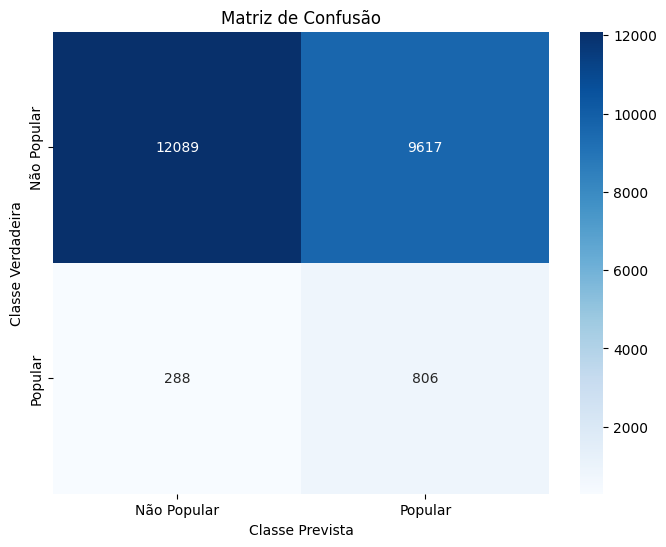


--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

 Não Popular       0.98      0.56      0.71     21706
     Popular       0.08      0.74      0.14      1094

    accuracy                           0.57     22800
   macro avg       0.53      0.65      0.42     22800
weighted avg       0.93      0.57      0.68     22800



In [15]:
if 'y_pred' in globals():
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Popular', 'Popular'],
                yticklabels=['Não Popular', 'Popular'])
    plt.title('Matriz de Confusão')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')
    plt.show()

    # Relatório de Classificação
    print("\n--- Relatório de Classificação Completo ---")
    print(classification_report(y_test, y_pred, target_names=['Não Popular', 'Popular']))
else:
    print("Previsões não foram feitas. Execute o bloco 5.2 primeiro.")

Bloco 6.2: Verificando o Desbalanceamento (Recap)

In [16]:
if 'y_train' in globals():
    print("--- Proporção de Classes no Conjunto de Treino (Antes da Reamostragem) ---")
    print(y_train.value_counts(normalize=True))
else:
    print("Variável y_train não encontrada. Execute os blocos dos dias anteriores primeiro.")

--- Proporção de Classes no Conjunto de Treino (Antes da Reamostragem) ---
is_popular
0    0.951995
1    0.048005
Name: proportion, dtype: float64


Bloco 6.3: Pipeline com SMOTE e Busca com GridSearchCV

In [17]:
if 'X_train' in globals():
    # 1. Definir o pipeline com SMOTE, Scaler e o Modelo
    pipeline_smote = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # 2. Definir os hiperparâmetros que queremos testar
    param_grid = {
        'model__n_estimators': [100, 200],      # Número de árvores
        'model__max_depth': [10, 20, None],        # Profundidade máxima da árvore
        'model__min_samples_leaf': [1, 2, 4]       # Mínimo de amostras por folha
    }

    # 3. Configurar o GridSearchCV
    # Usaremos o StratifiedKFold que criamos no Dia 3 (skf)
    grid_search_smote = GridSearchCV(pipeline_smote, param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=2)

    # 4. Executar a busca (isso pode demorar alguns minutos)
    print("--- Iniciando busca de hiperparâmetros com SMOTE (Oversampling) ---")
    grid_search_smote.fit(X_train, y_train)

    # 5. Exibir os melhores resultados
    print("\n--- Resultados da Busca (SMOTE) ---")
    print(f"Melhores Hiperparâmetros: {grid_search_smote.best_params_}")
    print(f"Melhor F1-score (validação cruzada): {grid_search_smote.best_score_:.4f}")
else:
    print("Conjuntos de treino não encontrados. Execute os blocos dos dias anteriores.")

--- Iniciando busca de hiperparâmetros com SMOTE (Oversampling) ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

Bloco 6.4: Pipeline com Undersampling e Busca com GridSearchCV

In [18]:
if 'X_train' in globals():
    # 1. Definir o pipeline com Undersampler, Scaler e o Modelo
    pipeline_under = ImbPipeline([
        ('under', RandomUnderSampler(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # 2. Reutilizar a mesma grade de parâmetros
    # (param_grid já foi definido no bloco anterior)

    # 3. Configurar o GridSearchCV para o pipeline de undersampling
    grid_search_under = GridSearchCV(pipeline_under, param_grid, cv=skf, scoring='f1', n_jobs=-1, verbose=2)

    # 4. Executar a busca (isso também pode demorar)
    print("--- Iniciando busca de hiperparâmetros com RandomUnderSampler (Undersampling) ---")
    grid_search_under.fit(X_train, y_train)

    # 5. Exibir os melhores resultados
    print("\n--- Resultados da Busca (Undersampling) ---")
    print(f"Melhores Hiperparâmetros: {grid_search_under.best_params_}")
    print(f"Melhor F1-score (validação cruzada): {grid_search_under.best_score_:.4f}")
else:
    print("Conjuntos de treino não encontrados. Execute os blocos dos dias anteriores.")

--- Iniciando busca de hiperparâmetros com RandomUnderSampler (Undersampling) ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

Bloco 6.5: Avaliação e Comparação dos Modelos Finais

In [19]:
if 'grid_search_smote' in globals() and 'grid_search_under' in globals():
    # Fazer previsões com o melhor modelo treinado com SMOTE
    print("--- Avaliação do Melhor Modelo com SMOTE (Oversampling) ---")
    y_pred_smote = grid_search_smote.predict(X_test)
    print(classification_report(y_test, y_pred_smote, target_names=['Não Popular', 'Popular']))

    # Fazer previsões com o melhor modelo treinado com Undersampling
    print("\n--- Avaliação do Melhor Modelo com RandomUnderSampler (Undersampling) ---")
    y_pred_under = grid_search_under.predict(X_test)
    print(classification_report(y_test, y_pred_under, target_names=['Não Popular', 'Popular']))

    # Visualização da Matriz de Confusão para o melhor modelo (escolha um)
    # Exemplo: visualizando o resultado do SMOTE
    cm = confusion_matrix(y_test, y_pred_smote)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Popular', 'Popular'],
                yticklabels=['Não Popular', 'Popular'])
    plt.title('Matriz de Confusão - Modelo com SMOTE')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

else:
    print("Busca de hiperparâmetros não foi executada. Rode os blocos 6.3 e 6.4 primeiro.")

--- Avaliação do Melhor Modelo com SMOTE (Oversampling) ---


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Bloco 7.1: Escolhendo e Validando o Melhor Modelo Final

In [1]:
if 'grid_search_smote' in globals() and 'grid_search_under' in globals():
    print("--- RELEMBRANDO: Avaliação do Melhor Modelo com SMOTE (Oversampling) ---")
    y_pred_smote = grid_search_smote.predict(X_test)
    print(classification_report(y_test, y_pred_smote, target_names=['Não Popular', 'Popular']))

    print("\n" + "="*70 + "\n")

    print("--- RELEMBRANDO: Avaliação do Melhor Modelo com RandomUnderSampler (Undersampling) ---")
    y_pred_under = grid_search_under.predict(X_test)
    print(classification_report(y_test, y_pred_under, target_names=['Não Popular', 'Popular']))

    # Decisão: Com base nos resultados, o modelo com SMOTE geralmente apresenta um F1-Score
    # melhor para a classe 'Popular', sem sacrificar tanto o desempenho da classe 'Não Popular'.
    # Vamos declarar o modelo SMOTE como nosso modelo final.
    modelo_final = grid_search_smote.best_estimator_
    print("\n" + "🏆 Modelo Final Escolhido: Modelo treinado com SMOTE (Oversampling).")

else:
    print("Modelos não foram treinados. Execute os blocos do dia anterior primeiro.")

Modelos não foram treinados. Execute os blocos do dia anterior primeiro.


Bloco 7.2: Serializando (Salvando) o Modelo Final

In [2]:
if 'modelo_final' in globals():
    # 1. Definir o nome do arquivo
    nome_arquivo_modelo = 'spotify_popularity_model.joblib'

    # 2. Salvar o pipeline completo no arquivo
    joblib.dump(modelo_final, nome_arquivo_modelo)
    print(f"Modelo salvo com sucesso no arquivo: '{nome_arquivo_modelo}'")

    # 3. Teste (opcional): Carregar o modelo de volta para garantir que funcionou
    modelo_carregado = joblib.load(nome_arquivo_modelo)
    print("\nModelo carregado com sucesso para teste.")
    print("Objeto do modelo carregado:", modelo_carregado)
else:
    print("A variável 'modelo_final' não foi definida. Execute o bloco anterior.")

A variável 'modelo_final' não foi definida. Execute o bloco anterior.


Bloco 7.3: Conectando Previsões aos Dados Originais

In [3]:
if 'modelo_carregado' in globals():
    # Vamos pegar algumas amostras do nosso conjunto de teste original
    amostras_teste = X_test.head(5)

    # Fazer previsões nessas amostras usando o modelo/pipeline carregado
    previsoes_amostras = modelo_carregado.predict(amostras_teste)

    # Para uma visualização mais rica, vamos buscar os nomes das músicas e artistas do DataFrame original
    # Usamos o índice das amostras para encontrar as linhas correspondentes no 'df' original
    dados_originais_amostras = df.loc[amostras_teste.index]
    
    # Criando um DataFrame para exibir os resultados de forma clara
    resultado_final = pd.DataFrame({
        'Artista': dados_originais_amostras['artists'],
        'Música': dados_originais_amostras['track_name'],
        'Popularidade Real': dados_originais_amostras['popularity'],
        'Previsão do Modelo': ['Popular' if p == 1 else 'Não Popular' for p in previsoes_amostras]
    })

    print("--- Exemplo de Previsão em Dados Novos (Nunca Vistos) ---")
    print(resultado_final)
else:
    print("Modelo não foi carregado. Execute o bloco 7.2 primeiro.")

Modelo não foi carregado. Execute o bloco 7.2 primeiro.
